In [1]:
%matplotlib inline

import sys
sys.path.append('/home/wt/py_projects/HPE-3d')
sys.path.append('/home/wt/py_projects/HPE-3d/datasets')


import numpy as np
import matplotlib.pyplot as plt
from datasets.h36m import Human36mDataset

In [25]:
dir_path = '../data/'
data_path = dir_path + 'data_2d_h36m_gt.npz'
data_path_3d = dir_path + 'data_3d_h36m.npz'
keypoints = np.load(data_path, allow_pickle=True)['positions_2d'].item()
dataset = Human36mDataset(data_path_3d,True)
print(dataset._skeleton.num_joints())


Preparing Human36mDataset...
17


In [59]:
subject = 'S1'
action = 'Photo'
camera = 0
kps = keypoints[subject][action][camera] 
anim = dataset[subject][action]
jts = dataset[subject][action]['positions']

print(kps.shape)
print(jts.shape)
frame = 1000

coordinates_2d = kps[frame]
coordinates_3d = jts[frame] # global
print(coordinates_2d)
print(coordinates_3d)

(1036, 17, 2)
(1036, 17, 3)
[[461.0422  443.79468]
 [490.15634 446.87653]
 [495.20596 526.21954]
 [514.58386 617.2722 ]
 [431.83118 440.718  ]
 [443.1272  536.473  ]
 [452.75607 634.029  ]
 [473.423   397.39456]
 [466.74994 339.77222]
 [475.6437  325.20697]
 [472.01257 300.53842]
 [436.16632 355.10306]
 [396.0084  400.18143]
 [434.87933 393.9382 ]
 [498.7196  351.9174 ]
 [534.18945 387.40747]
 [487.563   372.1866 ]]
[[-0.0315397   0.150189    0.91365397]
 [-0.15633473  0.19443089  0.9016464 ]
 [-0.2562036   0.04034496  0.49860868]
 [-0.34323618  0.10027412  0.05686518]
 [ 0.09325556  0.10594703  0.9256616 ]
 [ 0.04451055  0.1402464   0.4867961 ]
 [ 0.01814124  0.21370365  0.03934522]
 [-0.05468635  0.23157068  1.1312613 ]
 [-0.02232989  0.21886614  1.385978  ]
 [-0.09340876  0.14357962  1.4488541 ]
 [-0.06567652  0.16287379  1.5587821 ]
 [ 0.10426317  0.17579381  1.3157618 ]
 [ 0.2506747   0.06129211  1.107847  ]
 [ 0.02545245 -0.05000209  1.1239179 ]
 [-0.15473957  0.27123728  1.33562

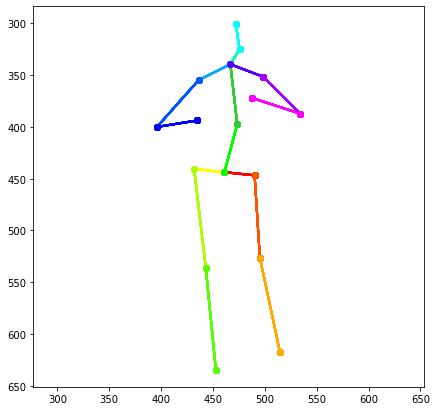

In [60]:
joint_pairs = [[0, 1], [1, 2], [2, 3], [0, 4], [4, 5], [5, 6],
               [0, 7], [7, 8], [8, 9], [9, 10], [8, 11], [11, 12],
               [12, 13], [8, 14], [14, 15], [15, 16]]

colors_kps = [[255, 0, 0], [255, 85, 0], [255, 170, 0], [255, 255, 0], [170, 255, 0], [85, 255, 0], [0, 255, 0],
              [50, 205, 50], [0, 255, 170], [0, 255, 255], [
                  0, 170, 255], [0, 85, 255], [0, 0, 255], [85, 0, 255],
              [170, 0, 255], [255, 0, 255]]


def plot_keypoint(coordinates):
    plt.figure(figsize=(7,7))
    x_max = coordinates_2d[:, 0].max()
    x_min = coordinates_2d[:, 0].min()
    y_max = coordinates_2d[:, 1].max()
    y_min = coordinates_2d[:, 1].min()
    # axes.set_xlim([0,h36m_cameras_intrinsic_params['res_w']])
    # axes.set_ylim([h36m_cameras_intrinsic_params['res_h'],0])
    plt.xlim(x_min-20,x_max+20)
    plt.ylim(y_max+20,y_min-20)
    plt.axis('equal')

    for i in range(coordinates.shape[0]):
        pts = coordinates[i]
        for color_i, jp in zip(colors_kps, joint_pairs):
            color_i = [c / 255 for c in color_i]
            pt_a = coordinates[jp[0]]
            pt_b = coordinates[jp[1]]
            # pt_a_x, pt_a_y, pt_b_x, pt_b_y = int(pt_a[0]), int(
            #     pt_a[1]), int(pt_b[0]), int(pt_b[1])
            pt_a_x, pt_a_y, pt_b_x, pt_b_y = pt_a[0],pt_a[1], pt_b[0], pt_b[1]
            plt.plot((pt_a_x, pt_b_x), (pt_a_y, pt_b_y), color=color_i, lw=2.0)
            plt.plot(pt_a_x,pt_a_y,marker='o',color=color_i)
            plt.plot(pt_b_x,pt_b_y,marker='o',color=color_i)


plot_keypoint(coordinates_2d)


In [61]:
# from common.camera import *
# cam = anim['cameras'][0]
# print(cam)

# pos_3d = world_to_camera(anim['positions'],R=cam['orientation'],t=cam['translation'])
# print(pos_3d.shape)
# print(pos_3d[:,:1].shape)
from common.camera import *

cam  =anim['cameras'][camera]
pos_3d = world_to_camera(anim['positions'],R=cam['orientation'],t=cam['translation'])
# Remove global offset, but keep trajectory in first position
# 这里是将0号关节置于相机坐标系的中心
# 因此pos_3d[:, 0]本应该全置为0， 但是代码里没有在这里做，而是在训练阶段做
# 即 inputs_3d[:, :, 0] = 0
print(pos_3d[frame])
pos_3d[:, 1:] -= pos_3d[:, :1]
pos_3d[:,0] = 0

coordinates_3d = pos_3d[frame] # camera space
print(coordinates_3d)

[[-0.23330903 -0.3249879   5.1824636 ]
 [-0.10160899 -0.31164646  5.1948085 ]
 [-0.08248281  0.0512948   5.447915  ]
 [ 0.00988936  0.49151945  5.510951  ]
 [-0.3650093  -0.33832932  5.170119  ]
 [-0.31790805  0.09641838  5.24034   ]
 [-0.27577555  0.5478163   5.268066  ]
 [-0.17381895 -0.52524567  5.078208  ]
 [-0.20198298 -0.7760644   5.0293617 ]
 [-0.16555214 -0.85506797  5.113652  ]
 [-0.18035436 -0.9581344   5.0648293 ]
 [-0.33697653 -0.70833826  5.0305276 ]
 [-0.522357   -0.51722     5.113496  ]
 [-0.36050224 -0.5646901   5.300363  ]
 [-0.06103361 -0.72398424  5.0445743 ]
 [ 0.09913087 -0.5865059   5.2268596 ]
 [-0.11648321 -0.66919565  5.3270607 ]]
[[ 0.          0.          0.        ]
 [ 0.13170004  0.01334143  0.01234484]
 [ 0.15082622  0.3762827   0.26545143]
 [ 0.2431984   0.81650734  0.3284874 ]
 [-0.13170028 -0.01334143 -0.01234484]
 [-0.08459902  0.42140627  0.05787659]
 [-0.04246652  0.87280416  0.08560228]
 [ 0.05949008 -0.20025778 -0.10425568]
 [ 0.03132606 -0.4510765

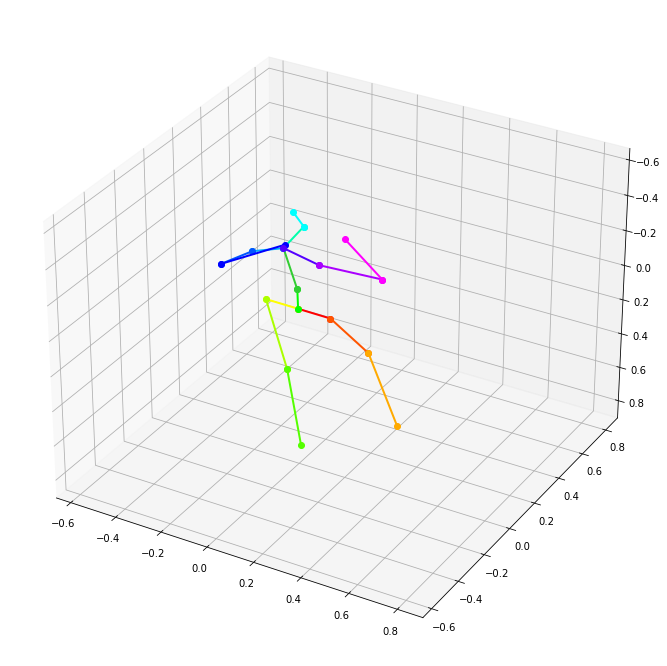

In [62]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
ymin = coordinates_3d.min()
ymax = coordinates_3d.max()

ax.set_zlim([ymax,ymin])
ax.set_xlim([ymin,ymax])
ax.set_ylim([ymin,ymax])

# ax.set_aspect('equal')

for color_i, jp in zip(colors_kps, joint_pairs):
    color_i = [c / 255 for c in color_i]
    pt_a = coordinates_3d[jp[0]]
    pt_b = coordinates_3d[jp[1]]
    # print(pt_a,pt_b)
    pt_a_x, pt_a_y, pt_a_z, pt_b_x, pt_b_y, pt_b_z = pt_a[
        0],   pt_a[1], pt_a[2], pt_b[0], pt_b[1], pt_b[2]
    # print(pt_a_z,pt_b_z)

    ax.plot((pt_a_x, pt_b_x), (pt_a_z, pt_b_z),
            (pt_a_y, pt_b_y), lw=2.0, c=color_i)
    ax.plot(pt_a_x, pt_a_z, pt_a_y, marker='o', color=color_i)
    ax.plot(pt_b_x, pt_b_z, pt_b_y, marker='o', color=color_i)
